# Regresión
**Autor:** José A. Troyano &nbsp;&nbsp;&nbsp; **Revisor:** Beatriz Pontes &nbsp;&nbsp;&nbsp;     &nbsp;&nbsp;&nbsp; **Última modificación:** 31/03/2023

-----------------------------------
## Contenido

1. <a href="#entrenamiento"> Entrenamiento de un regresor  </a> <br>
    1.1. <a href="#regresion_lineal"> Regresión lineal </a><br>
    1.2. <a href="#estimador_reg_lin"> El estimador _LinearRegression_ </a> <br>
2. <a href="#evaluacion"> Métricas de evaluación  </a> <br>
3. <a href="#otros"> Más regresores  </a> <br>
4. <a href="#dilema"> _Underfitting_, _good fitting_, _overfitting_ y el dilema sesgo-varianza </a> <br>
    4.1. <a href="#visualizacion"> Visualización de la predicción para regresión univariable  </a> <br>
    4.2. <a href="#curva_dataset">Curvas de aprendizaje en función del tamaño del conjunto de entrenamiento</a> <br>
    4.3. <a href="#curva_complejidad">Curvas de aprendizaje en función de la complejidad del modelo</a> <br>

------------------------------------------------------------------------------

En este _notebook_ veremos cómo entrenar y evaluar un regresor, exploraremos la oferta de regresores de Sklearn y veremos distintas técnicas para identificar situaciones de _overfitting_. 

Empezaremos por importar todos los elementos que usaremos a lo largo del notebook:

In [1]:
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, validation_curve, learning_curve

C:\Users\valle\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Usaremos el dataset _concrete_, disponible en el repositorio UCI. El dataset contiene 1030 registros correspondientes a medidas de resistencia de hormigón. Los atributos se corresponden con las proporciones de la mezcla distintas muestras de hormigón y la edad (en días) de la muestra. La variable numérica a predecir es la resistencia de cada muestra.

In [4]:
# EJERCICIO: leer el fichero 'concrete.csv' y crear el dataframe 'X' para los atributos, y la serie 'y' para la clase (atributo 'Concrete compressive strength')
datos = pd.read_csv("concrete.csv")

#Separar los atributos (X) de la clase (Y)
X = datos.drop(columns=['Concrete compressive strength'])
y = datos['Concrete compressive strength']

X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


## 1. Entrenamiento de un regresor <a name="entrenamiento"> </a>

Entrenar un clasificador es muy simple en Sklearn, basta con crear un objeto del estimador que queramos entrenar y ejecutar el método <code>fit</code>. En este notebook usaremos uno de los regresores más comunes: <code>LinearRegression</code>.

### 1.1 ¿Qué es la regresión lineal? <a name="regresion_lineal"> </a>

Es un modelo matemático usado para aproximar la relación entre una variable dependiente $y$, y las variables independientes $x_i$. El modelo se expresa con la siguiente fórmula:

$$
y \approx \alpha+\beta_1x_1+\beta_2x_2...+\beta_nx_n
$$

Sklearn proporciona distinos métodos para realizar regresión lineal. El más simple de ellos es el de los _mínimos cuadrados_ que es el que implementa el estimador <code>LinearRegression</code>. La técnica de los mínimos cuadrados se utiliza para determinar los coeficientes de una función de regresión que minimicen la suma de los cuadrados de los errores. Para una función de regresión lineal, se trataría de minimizar esta expresión:

$$
S = \sum (y - f(X))^2 = \sum (y - \alpha+\beta_1x_1+\beta_2x_2...+\beta_nx_n)^2
$$


### 1.2 El estimador <code>LinearRegression</code> <a name="estimador_reg_lin"> </a>

In [6]:
# EJERCICIO: crear un estimador de la clase LinearRegression y entrenarlo con el dataset <X,y>
estimador = LinearRegression()
estimador.fit(X,y)

LinearRegression()

Una vez entrenado un estimador, podemos usarlo para predecir la clase de un conjunto de instancias con el método <code>predict</code>.

In [7]:
# EJERCICIO: predecir la salida de los primeros 10 valores de X con el regresor entrenado anteriormente
predicciones = estimador.predict(X.head(10))
predicciones

array([53.46346329, 53.73475651, 56.81258504, 67.66368153, 60.91205585,
       26.85991563, 68.42076149, 29.92792448, 19.7781474 , 31.44208441])

Podemos aplicar validación cruzada para evaluar. Por defecto la métrica de evaluación es <code>r2_score</code> aunque, como veremos en la siguiente sección, hay más métricas implementadas en Sklearn.

In [12]:
# EJERCICIO: predecir la salida de todas las instancias mediante validación cruzada y guardar las prediccciones en y_pred
y_pred = cross_val_predict(estimador, X, y, cv=10)
y_pred[:10]

array([53.31616047, 53.75523611, 61.10426739, 74.14150413, 68.48871563,
       26.71337155, 74.56828326, 28.32040134, 18.20485915, 29.1739596 ])

In [10]:
# EJERCICIO: calcular el score por defecto sobre todas las instancias mediante validación cruzada
scores = cross_val_score(estimador, X, y, cv=10)
scores.mean()

0.27820729160873797

In [16]:
# EJERCICIO: dividir el dataset <X, y> en dos datasets <X_train, y_train> y <X_test, y_test> con una distribución 80%-20%,
#            entrenar el regresor con <X_train, y_train> y calcular la métrica r2 con <X_test, y_test>
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
estimador.fit(X_train, y_train)
y_test_pred = estimador.predict(X_test)
metrics.r2_score(y_test, y_test_pred)

0.6646785999576503

## 2. Métricas de evaluación <a name="evaluacion"> </a>

En las tareas de clasificación las métricas de evaluación se basan en el número de aciertos de las predicciones. En la regresión, sin embargo, no se puede hablar de aciertos ya que las predicciones son numéricas y es muy improbable predecir exactamente el valor correcto. Lo importante para evaluar un regresor es medir la diferencia entre el valor real y el valor predicho. 

En esta sección tres de las métricas más populares para evaluar la calidad de los regresores:
Métricas de error (cuánto peor valor, mejor):
- MAE: _mean absolute error_ (en términos de la magnitud a predecir)
- MSE: _mean squared error_ (da más peso a los errores grandes)
- MLSE: _mean squared logarithmic error_(da más peso a los errores pequeños, especialmente indicada cuando la variable a predecir presenta un rango muy amplio de valores)
Métricas de acierto (cuánto mejor valor, mejor):
- R2: coeficiente de determinación (normalizada de $-1$ a $1$

Las fórmulas para cada una de las tres métricas son:

$$
MAE = \frac{\sum |\;y -f(X)\;|}{n}
$$

$$
MSE = \frac{\sum (y -f(X))^2}{n}
$$

$$
MLSE = \frac{\sum (log(y+1) - log(f(X)+1)) ^2}{n}
$$

$$
R2 = 1 - \frac{\sum (y -f(X))^2}{\sum (\bar{y} - y)}
$$

In [33]:
# EJERCICIO: dadas los siguientes vectores 'y_real' e 'y_pred' calcular las métricas MAE, MSE y R2
#    y_real = [1,   0.5, 1.5, 0]
#    y_pred = [1.5, 0,   1.5,  1]

#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_real = [1, 0.5, 1.5, 0]
y_pred = [1.5, 0, 1.5, 1]

# Calcula MAE
mae = metrics.mean_absolute_error(y_real, y_pred)

# Calcula MSE
mse = metrics.mean_squared_error(y_real, y_pred)

# Calcula R2
r2 = metrics.r2_score(y_real, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

MAE: 0.5
MSE: 0.375
R2: -0.19999999999999996


In [31]:
# EJERCICIO: calcular las métricas MAE, MSE y R2 usando 'cross_val_score' y el estimador LinearRegression
# NOTA: los scores MAE y MSE son negativos para que los valores altos se correspondan con mejores resultados

# Calcular los scores utilizando validación cruzada
mae_scores = cross_val_score(estimador, np.array(y_real).reshape(-1, 1), y_pred, scoring='neg_mean_absolute_error', cv=2)
mse_scores = cross_val_score(estimador, np.array(y_real).reshape(-1, 1), y_pred, scoring='neg_mean_squared_error', cv=2)
r2_scores = cross_val_score(estimador, np.array(y_real).reshape(-1, 1), y_pred, scoring='r2', cv=2)

# Calcular el promedio de los scores
mae_avg = np.mean(mae_scores)
mse_avg = np.mean(mse_scores)
r2_avg = np.mean(r2_scores)

print("MAE:", mae_avg)
print("MSE:", mse_avg)
print("R2:", r2_avg)

MAE: -1.333333333333333
MSE: -2.4722222222222214
R2: -33.61728395061727


In [25]:
# EJERCICIO: repetir el cálculo de la  métricas MAE usando 'cross_val_predict'
y_pred_cv = cross_val_predict(estimador, np.array(y_real).reshape(-1, 1), y_pred, cv=2)

# Calcula MAE
mae_cv = mean_absolute_error(y_real, y_pred_cv)

# Calcula MSE
mse_cv = mean_squared_error(y_real, y_pred_cv)

# Calcula R2
r2_cv = r2_score(y_real, y_pred_cv)

print("MAE:", mae_cv)
print("MSE:", mse_cv)
print("R2:", r2_cv)

MAE: 0.9999999999999997
MSE: 1.2638888888888882
R2: -3.0444444444444425


## 3. Más regresores <a name="otros"> </a>

En esta sección usaremos la función <code>experimento</code> con distintos regresores e iremos guardando los resultados en el _dataframe_ <code>RESULTADOS</code>. 

In [ ]:
# DataFrame donde iremos guardando los resultados de los experimentos
RESULTADOS = pd.DataFrame(columns=['R2', 'TIEMPO'])

In [69]:
# EJERCICIO: implementar la función 'experimento' que encapsule todos los pasos del experimento de la sección anterior
#    PARÁMETROS DE ENTRADA:
#       - regresor: estimador usado en el experimento
#       - X: matriz de atributos
#       - y: vector de salida
#       - scoring: métrica usada en la evaluación (por defecto 'r2')
#    SALIDAS:
#       - Devolver la tupla (score, tiempo) con la puntuación del experimento y el tiempo invertido en segundos
def experimento(regresor, X, y, scoring='r2'):
    inicio = time.time()
    score = cross_val_score(regresor, X, y, scoring=scoring, cv=10).mean()
    fin =  time.time()
    return score, fin-inicio

experimento(estimador, X, y)

0.27820729160873797

In [79]:
# EJERCICIO: usar la función 'experimento' con los siguientes regresores y almacenar los resultados en el dataframe RESULTADOS:
# - Regresión lineal
# - Regresión lineal con Stochastic Gradient Descent Regressor
# - Regresión cuadrática basada en Regresión Lineal (hay que usar Pipeline y PolynomialFeatures)
# - Vecinos más cercanos, con valores para k en [1, 3, 5, 7]
# - Support Vector Regressor, con valores para kernel en ['linear', ‘rbf’, ‘sigmoid’]
# - Árbol de decisión
# - Random Forests, con valores para n_estimators en [10, 100, 1000]
# - Extra Trees, con valores para n_estimators en [10, 100, 1000]
# - Gradient Boosting Regression
from sklearn.tree import DecisionTreeRegressor

regresores = [
    (LinearRegression(),'Regresión lineal'),
    (DecisionTreeRegressor(), 'Arbol de decisión')
]

#print(regresores)

RESULTADOS = pd.DataFrame(columns=['MAE', 'MSE', 'R2', 'Tiempo medio'])

for regresor,titulo in regresores:
    mae = experimento(regresor,X,y, scoring='neg_mean_absolute_error')
    mse = experimento(regresor,X,y, scoring='neg_mean_squared_error')
    r2 = experimento(regresor,X,y, scoring='r2')
    RESULTADOS.loc[titulo] = (mae[0], mse[0], r2[0], 
                              np.mean([mae[1],mse[1],r2[1]]))
RESULTADOS

,MAE,MSE,R2,Tiempo medio
Regresión lineal,0.663625,0.663625,0.663625,0.074961
Arbol de decisión,0.689235,0.689235,0.689235,0.062776


## 4. _Underfitting_, _good fitting_, _overfitting_ y el dilema sesgo-varianza <a name="dilema"> </a>

La siguiente figura muestra gráficamente las situaciones de _underfitting_, _good fitting_, _overfitting_ en una tarea de regresión:

<img src="./img/under-good-over.jpg" alt="Drawing" style="width:10cm;"/>

Se suelen considerar dos fuentes de error en los modelos entrenados a partir de datos:
- **Sesgo (bias)**:
    - Error producto de la simplificación (y pérdida de información) que implica la construcción de un modelo. 
    - Un _sesgo alto_ implica _underfitting_.
- **Varianza (variance)**: 
    - Error producto de la dependencia de los datos usados. 
    - Mide el cambio que sufriría el modelo si se utilizaran datos de entrenamiento diferentes. 
    - Una _varianza alta_ implica _overfitting_.

La siguiente gráfica muestra de forma intuitiva el efecto de ambos tipos de error.

<img src="./img/bias-variance.jpg" alt="Drawing" style="width:10cm;"/>

El dilema _sesgo-varianza_ es el conflicto que se plantea al intentar minimzar ambas fuentes de error al entrenar un modelo. Hay una relación entre la complejidad del modelo y el dilema sesgo varianza que se suele ilustrar con una gráfica como la siguiente: 

<img src="./img/bias-variance-tradeoff.jpg" alt="Drawing" style="width:10cm;"/>

En la curva anterior se observan los siguientes fenómenos:
- Modelos simples: adocelcen de _underfitting_ y presentan alto sesgo (error de predicción) y baja varianza (dependencia de los datos de entrenamiento)
- Modelos complejos: adocelcen de _overfitting_ y presentan bajo sesgo (error de predicción) y alta varianza (dependencia de los datos de entrenamiento)


Las curvas de aprendizaje basadas en la complejidad del modelo también nos permiten identificar situaciones de alto sesgo (_underfitting_) y de alta varianza (_overfitting_):

<img src="./img/bias-variance-learning-curve.jpg" alt="Drawing" style="width:10cm;"/>


### 5.1. Visualización de modelos para regresión univariable <a name="visualizacion"> </a>

<Axes: xlabel='x', ylabel='x'>

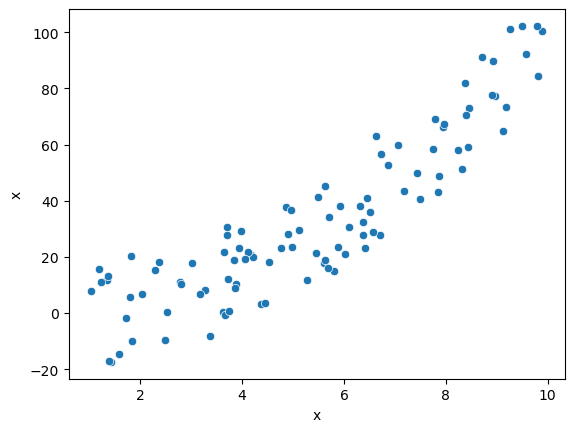

In [71]:
# Generamos un dataset para regresión univariable con las siguientes características:
#    - X: dataframe de una única columna con 100 valores reales aleatorios entre 1 y 10
#    - y: serie con la salida para cada x, con un valor x^2 (+/- un valor aleatorio entre 0 y 20)
#   Mostrar los puntos en un scatter_plot
np.random.seed(10)
X = pd.DataFrame(np.random.random((100,))*9+1, columns=['x'])
y = pd.Series(X['x']*X['x']+np.random.uniform(low=-20, high=20, size=(100,)))
sns.scatterplot(x=X['x'], y=y)

In [72]:
# EJERCICIO: definir la función 'muestra_modelo' que muestre cómo se adapta un modelo de regresión a los datos
#   ENTRADA:
#      - regresor: estimador para entrenar el modelo
#      - X: atributos del dataset (dataframe con una única columna)
#      - y: vector de salida para la regresión
#      - tiulo: mensaje a mostrar en el título de la gráfica, 
#               se mostrará también la métrica obtenida con la función 'experimento'
#      - subplot: 3-tupla con el subplot donde colocar la gráfica (por defecto None)
#               INCLUIR AL PRINCIPIO:
#                       if subplot!=None:
#                           plt.subplot(subplot[0], subplot[1], subplot[2])
#               INCLUIR AL FINAL:
#                       if subplot==None:
#                           plt.show()   
#      
#   SALIDA:
#   - Nube de puntos del dataset, sobre la que se superpone (con trazo en rojo) la línea de prediccciones del modelo
def muestra_modelo(estimador, X, y, titulo="", subplot=None):
    if subplot!=None:
        plt.subplot(subplot[0], subplot[1], subplot[2])
    if titulo=="":
        titulo = estimador.__class__
    modelo = estimador.fit(X, y)
    min_x = X.min()
    max_x = X.max()
    xs = pd.DataFrame(np.linspace(min_x, max_x, 1000), columns=['x'])
    y_pred = modelo.predict(xs)
    sns.scatterplot(x=X['x'], y=y, color='blue')
    sns.lineplot(x=xs['x'], y=y_pred, color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    score, _ = experimento(estimador, X, y)
    plt.title("{}   ({:.4f})".format(titulo,score))
    if subplot==None:
        plt.show()

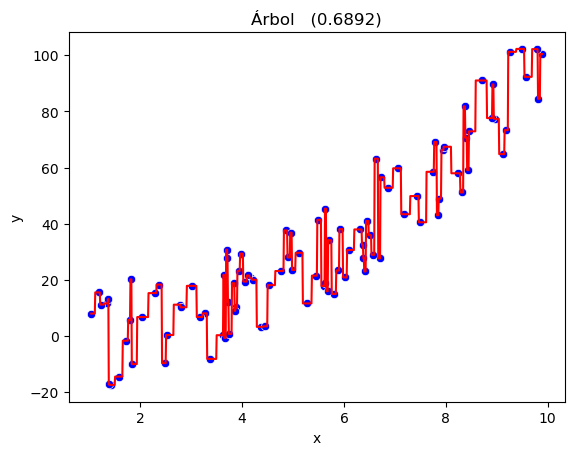

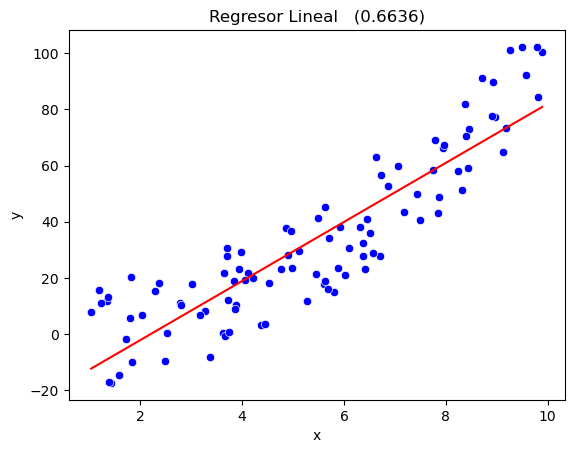

In [73]:
# EJERCICIO: usar la función muestra_modelo para trazar la curva aprendida por un regresor lineal
def experimento(regresor, X, y, scoring='r2'):
    inicio = time.time()
    score = cross_val_score(regresor, X, y, cv=10, scoring='r2').mean()
    fin = time.time()
    return score, fin-inicio

from sklearn.tree import DecisionTreeRegressor
muestra_modelo(DecisionTreeRegressor(), X, y, titulo="Árbol")
muestra_modelo(LinearRegression(), X, y, titulo="Regresor Lineal")

### 5.2. Curvas de aprendizaje en función del tamaño del conjunto de entrenamiento<a name="curva_dataset"> </a>
La funcion <code>learning_curve</code> nos permite analizar de qué manera afecta el tamaño del conjunto de entrenamiento en el rendimiento de un estimador. Se trata de ir entrenando modelos con _subconjuntos del dataset original_ de distintos tamaños. Esta función produce dos tipos de resultados:
- **Resultados sobre el conjunto de entrenamiento**: se usan los mismos datos para entrenar y evaluar 
- **Resultados de validación**: se usan distintos datos para entrenar y evaluar

Estas curvas pueden desvelar ciertas **tendencias al overfitting** y son muy útiles para detectar situaciones de **alto sesgo** y **alta varianza**.

In [ ]:
# EJERCICIO: mostrar el resultado de la función learning_curve para la siguiente configuración:
#    - Estimador: ExtraTreesRegressor
#    - Porcentaje dedicado a entrenamiento: 80%
#    - Tamaño del subconjunto del dataset más pequeño: 10 (de un dataset con 100 instancias)
#    - Número de subconjuntos a probar: 20
#    - Método de scoring: 'r2'
#    - Número de carpetas de la validación cruzada: 5
# NOTA: seguir los siguientes pasos
#    - Calcular tamaño_train y tamaño_test a partir de len(X) y del porcentaje de train
#    - Usar no.linespace para calcular una lista de tamaños linealmente crecientes para todos los subconjuntos

#foto

In [ ]:
# EJERCICIO: repetir el ejercicio calculando la media de cada fila (correspondiente a las validaciones cruzadas de cada experimento)


In [ ]:
# EJERCICIO: definir la función 'muestra_curva_aprendizaje_tamaño' que muestre este tipo de curvas
#   ENTRADA:
#    - estimador: sobre el que se realiza el experimento
#    - porcentaje_train: porcentaje dedicado a entrenamiento
#    - tamaño_inicial: del primer subconjunto de entrenamiento
#    - numero_subconjuntos: se calcularña un punto de la curva por cada subconjunto
#    - scoring: método de scoring (por defecto 'r2')
#    - cv: número de carpetas de la validación cruzada (por defecto 5)
#    - subplot: 3-tupla con el subplot donde colocar la gráfica (por defecto None)
#               INCLUIR AL PRINCIPIO:
#                       if subplot!=None:
#                           plt.subplot(subplot[0], subplot[1], subplot[2])
#               INCLUIR AL FINAL:
#                       if subplot==None:
#                           plt.show()
#    - rango_y: valores mínimo y máximo del eje y (por defecto None)
#   SALIDA:
#   - Curva de aprendizaje con trazo discontinuo rojo para entrenamiento, y continuo azul para validación


In [ ]:
# EJERCICIO: mostrar la curva de aprendizaje para la regresión lineal. Usar la siguiente configuración:
#    - porcentaje de train: 80
#    - tamaño de conjunto inicial: 20
#    - número de conjuntos: 20 con la siguiente configuración


En el siguiente ejercicio mostraremos, dos a dos, las curvas de modelo y de aprendizaje para distintos regresores. Las claves para intepretar los distintos fenómenos sobre las curvas de aprendizaje son:
- **overfitting**: los resultados sobre entrenamiento son muy buenos (rozando el máximo) y los de validación son sensiblemente peores
- **buen ajuste**: las curvas tienden a converger y se observa aún cierta tendencia al alza en la validación
- **alta varianza**: las curvas tienen muchos picos, es señal de una gran dependencia de los datos
- **alto sesgo**: la media de resultados es baja, y no hay tendencia a mejorar con el incremento de tamaño

In [ ]:
# EJERCICIO: mostrar la curva de aprendizaje y la de modelo para los siguientes regresores:
# - Regresión Lineal
# - Regresión lineal con Stochastic Gradient Descent Regressor
# - Regresión cuadrática basada en Regresión Lineal (hay que usar Pipeline y PolynomialFeatures)
# - Vecinos más cercanos, con valores para k en [1, 3, 5, 7]
# - Support Vector Regression, con valores para kernel en ['linear', ‘poly’, ‘rbf’, ‘sigmoid’]
# - Stochastic Gradient Descent
# - Árbol de decisión
# - Random Forests, con valores para n_estimators en [10, 100, 1000]
# - Extra trees, con valores para n_estimators en [10, 100, 1000]
# - Gradient Boosting Regression


### 5.3. Curvas de aprendizaje en función de la complejidad del modelo<a name="curva_complejidad"> </a>

Sklearn proporciona la funcion <code>validation_curve</code> que nos permite analizar de qué manera afectan los valores que toma un hiperparámetro (que en muchos casos se puede interpretar como una medida de la complejidad del modelo) en el rendimiento de un estimador. Esta función produce dos conjuntos de resultados:
- **Resultados sobre el conjunto de entrenamiento**: se usan los mismos datos para entrenar y evaluar 
- **Resultados de validación**: se usan distintos datos para entrenar y evaluar

Esto nos permite identificar situaciones de **overfitting** cuando hay mucha discrepancia (en modelos complejos) entre los resultados de validación y los del conjunto de entrenamiento.

In [ ]:
# EJERCICIO: mostrar el resultado de la función validation_curve para la siguiente configuración:
#    - Estimador: ExtraTreesRegressor
#    - Parámetro a evaluar: 'max_depth'
#    - Valores del parámetro: [1, 2, 3, 4, 5, 10, 20, 50]
#    - Método de scoring: 'r2'
#    - Número de carpetas de la validación cruzada: 5


In [ ]:
# EJERCICIO: repetir el ejercicio calculando la media de cada fila (correspondiente a las validaciones cruzadas de cada experimento)


In [ ]:
# EJERCICIO: definir la función 'muestra_curva_aprendizaje_complejidad' que muestre este tipo de curvas
#   ENTRADA:
#    - estimador: sobre el que se realiza el experimento
#    - nombre_parametro: parámetro a evaluar
#    - valores_parametros: para los que se calcularán puntos de la curva
#    - scoring: método de scoring (por defecto 'r2')
#    - cv: número de carpetas de la validación cruzada (por defecto 5)
#    - subplot: 3-tupla con el subplot donde colocar la gráfica (por defecto None)
#               INCLUIR AL PRINCIPIO:
#                       if subplot!=None:
#                           plt.subplot(subplot[0], subplot[1], subplot[2])
#               INCLUIR AL FINAL:
#                       if subplot==None:
#                           plt.show()
#     - rango_y: valores mínimo y máximo del eje y (por defecto None)
#   SALIDA:
#   - Curva de aprendizaje con trazo discontinuo rojo para entrenamiento, y continuo azul para validación


En los siguientes ejercicios mostraremos las curvas de modelo y de aprendizaje para distintos regresores. Las claves para intepretar los distintos fenómenos sobre las curvas de aprendizaje son:
- **overfitting**: valores del parámetro que provocan diferencias significativa de resultados entre train y validación
- **underfitting**: valores del parámetro que provocan bajos resultados en train y validación
- **buen ajuste**: valores del parámetro que provocan resultados coincidentes (y buenos) entre train y validación

In [ ]:
# EJERCICIO: mostrar la curva de aprendizaje para ExtraTreesRegressor y max_depth con valores en [1, 2, 3, 4, 5, 10, 20, 50]
#            mostrar en otra figura las siguientes curvas de modelo de ExtraTreesRegressor:
#               - Underfitting con max_depth=1, en subplot (1,3,1)
#               - Buen ajuste con max_depth=5, en subplot (1,3,2)
#               - Overfitting con ax_depth=50, en subplot (1,3,3)


In [ ]:
# EJERCICIO: mostrar la curva de aprendizaje para KNeighborsRegressor() y n_neighbors con valores en range(1,50)
#            mostrar en otra figura las siguientes curvas de modelo de KNeighborsRegressor:
#               - Underfitting con k=50, en subplot (1,3,1)
#               - Buen ajuste con k=15, en subplot (1,3,2)
#               - Overfitting con k=1, en subplot (1,3,3)
